## Задание
Скачайте материалы к ДЗ. Проанализируйте ряды, сделайте их стационарными.

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [2]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [3]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.01)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.01)

        plt.tight_layout()
    return

In [4]:
# возьмем временной ряд - количество пятен на солнце
series = pd.read_csv('../data/monthly-sunspots.csv.txt')['Sunspots'][:200] # "Month","Sunspots"
series = series.apply(lambda x: 0.001 if x <=0 else x)

Results of Dickey-Fuller Test:
Test Statistic                  -2.406317
p-value                          0.139961
#Lags Used                       2.000000
Number of Observations Used    197.000000
Critical Value (1%)             -3.463987
Critical Value (5%)             -2.876326
Critical Value (10%)            -2.574652
dtype: float64


C:\Users\mi\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


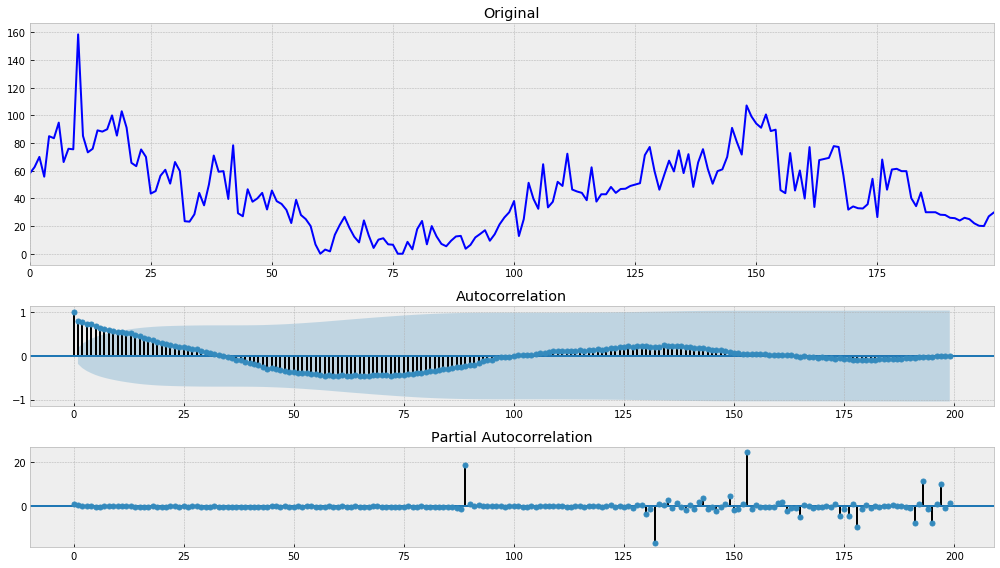

In [5]:
tsplot(series)

In [6]:
series = boxcox(series, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -1.313947
p-value                          0.622768
#Lags Used                      15.000000
Number of Observations Used    184.000000
Critical Value (1%)             -3.466398
Critical Value (5%)             -2.877380
Critical Value (10%)            -2.575214
dtype: float64


C:\Users\mi\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


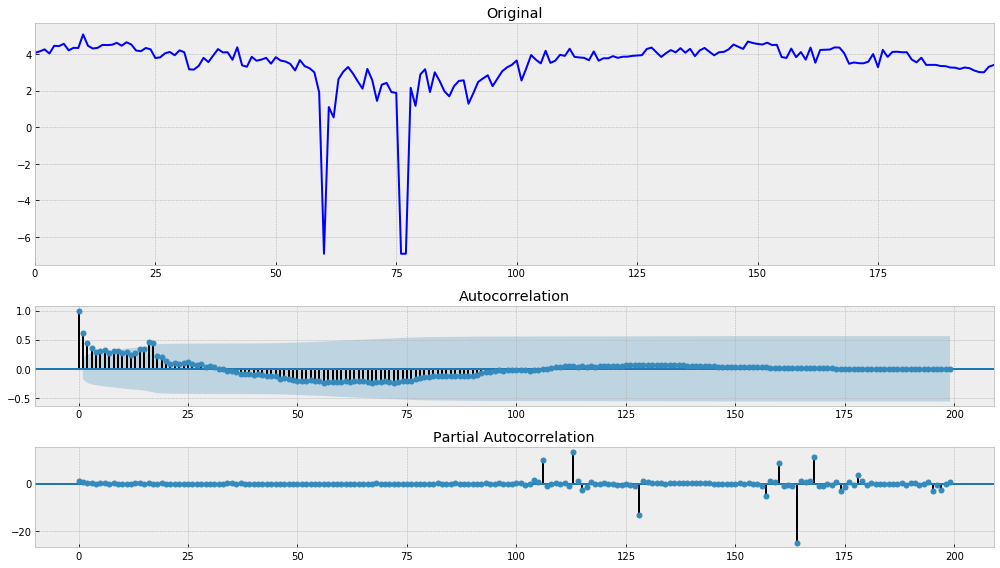

In [7]:
tsplot(series)

In [8]:
# продифференцируем
series = np.diff(series, 1)

Results of Dickey-Fuller Test:
Test Statistic                -7.649283e+00
p-value                        1.807337e-11
#Lags Used                     1.400000e+01
Number of Observations Used    1.840000e+02
Critical Value (1%)           -3.466398e+00
Critical Value (5%)           -2.877380e+00
Critical Value (10%)          -2.575214e+00
dtype: float64


C:\Users\mi\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


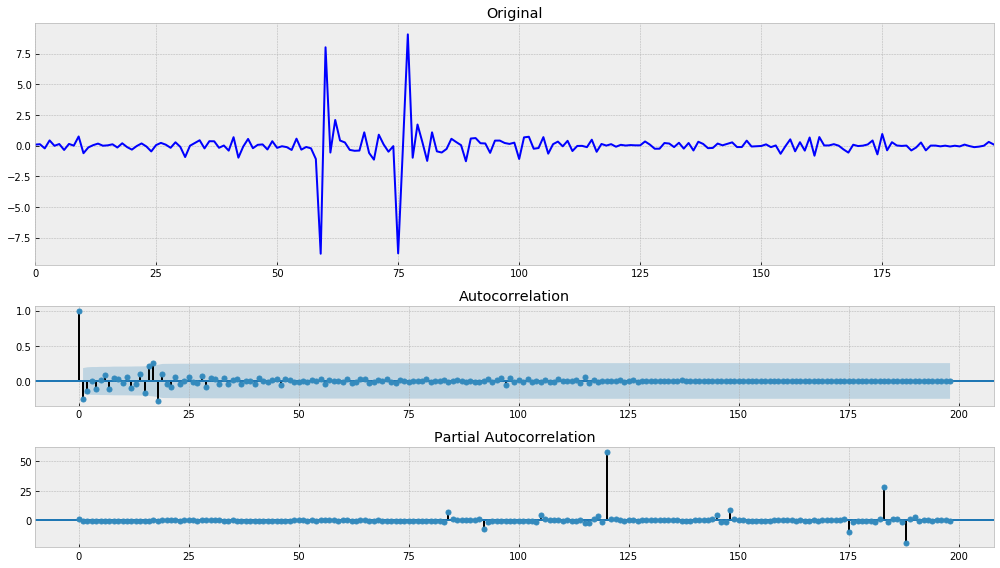

In [9]:
tsplot(series)

Судя по тесту Дики-Фулера и визуальному анализу корролелограмм исходный ряд стал стационарным